In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
import scipy.special as sp
from tqdm import tqdm
import scipy

In [2]:
qutip.__version__

'5.1.0.dev0+889dd09'

In [3]:
!pip show qutip

Name: qutip
Version: 5.1.0.dev0+889dd09
Summary: QuTiP: The Quantum Toolbox in Python
Home-page: https://qutip.org
Author: Alexander Pitchford, Paul D. Nation, Robert J. Johansson, Chris Granade, Arne Grimsmo, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguere, Boxi Li, Jake Lishman, Simon Cross
Author-email: qutip-admin@googlegroups.com
License: BSD 3-Clause License
Location: /opt/homebrew/Caskroom/miniconda/base/envs/fluxonium/lib/python3.11/site-packages
Editable project location: /Users/yunwei/Desktop/PycharmProjects/qutip
Requires: numpy, packaging, scipy
Required-by: dynamiqs, scqubits


In [3]:
delta = 0.  * 2*np.pi
eps0  = 1. * 2*np.pi
w_a = np.sqrt(delta**2 + eps0**2)

A     = 0.1* 2*np.pi

omega = 1 * w_a
T     = 2*np.pi / omega

tlist  = np.linspace(0.0, 30 * T, 1001)
psi0   = qutip.basis(2,1)

In [4]:
H0 = - delta/2.0 * qutip.sigmax() - eps0/2.0 * qutip.sigmaz()
H1 = A/2 * qutip.sigmax()
H = [H0, [H1, lambda t: np.cos(omega * t)]]

In [5]:
# noise power spectrum
gamma1 = 0.01
def noise_spectrum(w):
    return   4*gamma1 * (w>=0)
    # return   gamma1 * np.abs(w)**2 * (w>0)

In [6]:
temperature = 0e-3 # unit K 
h = 6.626e-34 
kB = 1.38e-23 
w_th = temperature * (kB / h) * 2 * np.pi * 1e-9    

In [ ]:
output = qutip.fmmesolve(
    H, psi0, tlist, [qutip.sigmax(), qutip.sigmaz()],
    spectra_cb=[noise_spectrum, noise_spectrum], T=T, w_th=w_th,
     options={"store_floquet_states": True}
)

10.0%. Run time:   0.01s. Est. time left: 00:00:00:00


20.0%. Run time:   0.02s. Est. time left: 00:00:00:00
30.0%. Run time:   0.02s. Est. time left: 00:00:00:00
40.0%. Run time:   0.03s. Est. time left: 00:00:00:00
50.0%. Run time:   0.04s. Est. time left: 00:00:00:00
60.0%. Run time:   0.04s. Est. time left: 00:00:00:00
70.0%. Run time:   0.05s. Est. time left: 00:00:00:00
80.0%. Run time:   0.05s. Est. time left: 00:00:00:00
90.0%. Run time:   0.06s. Est. time left: 00:00:00:00
100.0%. Run time:   0.07s. Est. time left: 00:00:00:00
Total run time:   0.07s


In [8]:
p_x = np.zeros(tlist.shape, dtype=np.complex128)
p_y = np.zeros(tlist.shape, dtype=np.complex128)
p_z = np.zeros(tlist.shape, dtype=np.complex128)
for idx, t in enumerate(tlist):
    psi_t = output.floquet_states[idx]
    p_x[idx] = qutip.expect(qutip.sigmax(), psi_t)
    p_y[idx] = qutip.expect(qutip.sigmay(), psi_t)
    p_z[idx] = qutip.expect(qutip.sigmaz(), psi_t)

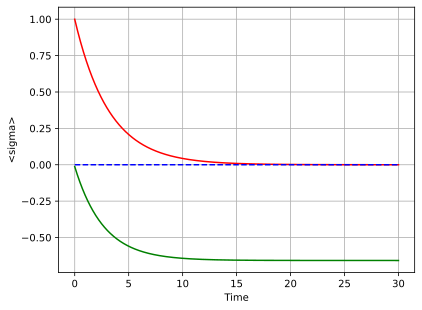

In [9]:
plt.plot(tlist, np.real(p_x), 'r-')
plt.plot(tlist, np.real(p_y), 'b--')
plt.plot(tlist, np.real(p_z), 'g')
plt.xlabel('Time')
plt.ylabel('<sigma>')
plt.grid()
plt.show()

In [10]:
from scipy.optimize import curve_fit

In [11]:
def model_function(t, a, c, tau):
    return a*np.exp(-t / tau) + c

In [12]:
popt_x, pcov = curve_fit(model_function, tlist, np.real(p_x), p0=[0.5, 0.5, 1], maxfev=50000)
a_fit, c_fit, tau_fit_z = popt_x
print(f"Fitted parameters: a = {a_fit:.4f}, c = {c_fit:.4f}, tau = {tau_fit_z:.4f}")

Fitted parameters: a = 0.9999, c = 0.0000, tau = 3.1824


In [13]:
1/ (2*np.pi*noise_spectrum(eps0) * (3/4 +1/2))

3.183098861837907